# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\math4\AppData\Local\conda\conda\envs\springboard\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


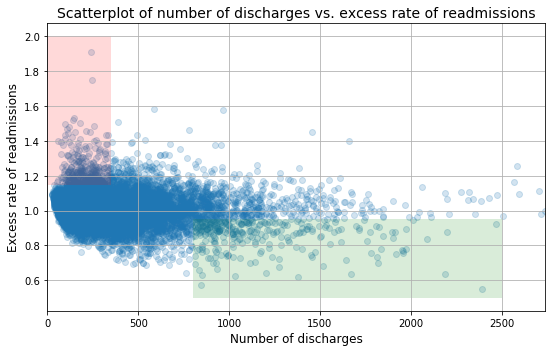

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

### A. Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendations for the following reasons: 

- A part: The initial observation based on the plot says that rate of readmissions tend to decrease as the number of discharges increases. However, the trend is not clearly shown in the plot. Also, the explanation with green and red boxes is also not very clear.
- B part: The hospitals/facilities were divded into groups, ones with number of discharges < 100 and the others with number of discharge > 1000 to compare the mean excess readmission rate and the percentage of excess readmission rate greater than 1. What about hospitals/facilities with number of discharge between 100 and 1000? I do not understand why they made the two groups in such a way.
- C part: It is not right to conclude that there is significant correlation between hospital capacity (number of discharges) and readmission rates without using any rigorous statistical method such as hypothesis tests or confidence intervals. A possible reason for the correlation was reported, but more investigation should be conducted to find out true reasons.
- D part: The report said that hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation. However, many hospitals/facilties with small capacity are actually as good as big hospitals/facilties. The better strategy would be investigating what can make those high excess readmission rates (say, over 1.4) regardless of hospitals/facilties capacity. The possible reason may be not care quality of hospitals/facilties, but patients or locations. I do not understand why the very last recommendation was made.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis

Before I set up the hypothesis test, I will check the dataset and find out why the subset of row [81:-3] was used to draw the scatter plot above.

In [10]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [12]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [16]:
clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']][76:86]

,Number of Discharges,Excess Readmission Ratio
16213,0,NaN
16234,0,NaN
16317,0,NaN
16339,0,NaN
14074,0,NaN
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


I found that the first 81 rows have missing values in Excess Readmission Ratio and zero number of discharges. That was why the first 81 rows were removed in the scatter plot. What about the last 3 rows? I will first remove the first 81 rows from the dataset before finding it out.

In [13]:
cleaner_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])

In [29]:
#cleaner_df.info()

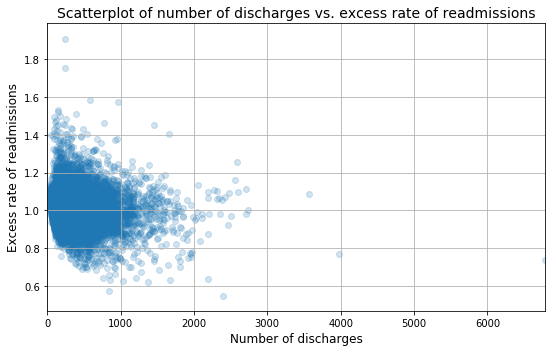

In [30]:
x = cleaner_df['Number of Discharges']
y = cleaner_df['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

I found the last three rows had extremely high number of discharge over 3000 using a new scatter plot (including those 3).

In [18]:
# the last 3 rows with extreme number of discharge
clean_hospital_read_df[-3:]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


Removing the 81 rows with missing values excess readmission ratio makes sense. However, I am not sure if removing the last three is reasonable since the observations have normal values for other columns. If we have to remove the three, then what about the two points with extreme excess readmission ratio (over 1.6)? Therefore, I will keep the three rows. I checked removing those 3 or even those 2 with extreme readmission ratio do not really make a noticeable change in my analysis and conclusion anyway.   

In [32]:
#np.corrcoef(cleaner_df['Number of Discharges'], cleaner_df['Excess Readmission Ratio'])[0,1]
#np.corrcoef(cleaner_df['Number of Discharges'][:-3], cleaner_df['Excess Readmission Ratio'][:-3])[0,1]
#np.corrcoef(cleaner_df[cleaner_df['Excess Readmission Ratio']<=1.6]['Number of Discharges'], cleaner_df[cleaner_df['Excess Readmission Ratio']<=1.6]['Excess Readmission Ratio'])[0,1]
#np.corrcoef(cleaner_df[cleaner_df['Excess Readmission Ratio']<=1.6]['Number of Discharges'][:-3], cleaner_df[cleaner_df['Excess Readmission Ratio']<=1.6]['Excess Readmission Ratio'][:-3])[0,1]

### 1. Setup an appropriate hypothesis test

The appropriate hypothesis test is the hypothesis test for correlation. 
- Null hypothesis: the population correlation is zero i.e., r=0
- Alternative hypothesis: the population correlation is not zero (two-sided) i.e., r!=0 

### 2. Compute and report the observed significance value (or p-value).

In [24]:
from scipy.stats import pearsonr

In [33]:
corr, p_value = pearsonr(cleaner_df['Number of Discharges'], cleaner_df['Excess Readmission Ratio'])
print("Pearson’s correlation coefficient:", round(corr,4))
print("p-value:", p_value)

Pearson’s correlation coefficient: -0.0974
p-value: 1.222547377680967e-25


### 3. Report statistical significance for  α  = .01.

The correlation is - 0.0974 and this is significantly different from zero since the p-value 1.2225e-25 is less than .01, the given significance level. This means there is some negative correlation between excess readmission rate and hospital/facility capacity.

### 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The p-value we found was close to zero, so the correlation we found is statistically significant. However, practical significance considers if the correlation itself is large enough in a practical sense. The correlation we found here is -0.0974, which is between -0.1 and 0.1. A correlation coefficient is usually said to have no linear relationship or a very weak linear relationship when the value is between -0.1 and 0.1. 

Thus, I would not recommend to require hospitals/facilties with small capacity to demonstrate upgraded resource allocation for quality care. Instead, I would recommend to investigate what other factors can make those high excess readmission rates (regardless of hospitals/facilties capacity). A possible factor may be not only care quality of hospitals/facilties, but also patients or locations.

### 5. Look at the scatterplot above.
 - What are the advantages and disadvantages of using this plot to convey information?
 - Construct another plot that conveys the same information in a more direct manner.

Advantages: 
- The strength of relationship can be visually shown (dispersed -> week relationship).
- Outliers can be easily detected.
- The grid lines help to find values.

Disadvantages:
- It is hard to see the trend (kind of negative?) since points are scattered to both directions. 
- It takes a while to understand the description about the shaded red and green boxes.

slope = -2.901051733057071e-05
intercept = 1.0181061473733573


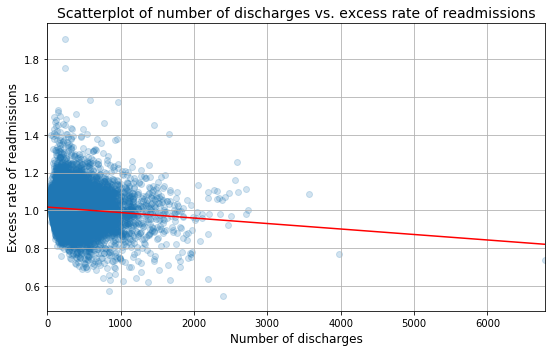

In [42]:
x = cleaner_df['Number of Discharges']
y = cleaner_df['Excess Readmission Ratio']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2 )

# Perform a linear regression
a, b = np.polyfit(x, y,1)
# Print the results
print('slope =', a)
print('intercept =', b)
# Make theoretical line to plot
x_theo = np.array([0,max(x)])
y_theo = a * x_theo + b
plt.plot(x_theo, y_theo, c='red' )

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
#ax.set_yscale('log')

ax.grid(True)
fig.tight_layout()

The red linear regression line helps to see the negative relationship right away.